## Plot Circular Dichroism Results for SVKF and SKVF peptides

### Import libraries and load analysis specific parameters

In [1]:
library(tidyverse)
library(rasilabRtemplates)

ss_names = c("alpha" = "α-helix", "beta" = "β-strand", "coil" = "random coil")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Read in CD data

In [4]:

cd_data <- read_csv("../data/all_data.csv") %>% 
  janitor::clean_names() %>% 
  rename(dich = cm2_dmol_1) %>% 
  print()

Rows: 4208 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): sample
dbl (3): wavelength, cm2_dmol-1, voltage

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 4,208 × 4
   sample  wavelength  dich voltage
   <chr>        <dbl> <dbl>   <dbl>
 1 Alpha_0       250  0.117    295.
 2 Alpha_0       250. 0.146    295.
 3 Alpha_0       250. 0.163    295.
 4 Alpha_0       250. 0.181    295.
 5 Alpha_0       250. 0.235    295.
 6 Alpha_0       250. 0.247    295.
 7 Alpha_0       249. 0.270    295.
 8 Alpha_0       249. 0.286    295.
 9 Alpha_0       249. 0.338    295.
10 Alpha_0       249. 0.395    295.
# … with 4,198 more rows


### Read in annotations

In [5]:

annotations <- read_csv("../data/sampleannotations.csv") %>% print()

Rows: 7 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): sample, insert, secondary
dbl (2): order, percent_tfe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 7 × 5
  order sample   insert secondary percent_tfe
  <dbl> <chr>    <chr>  <chr>           <dbl>
1     1 Alpha_0  SKVF   alpha               0
2     2 Alpha_20 SKVF   alpha              20
3     3 Alpha_40 SKVF   alpha              40
4     4 Beta_0   SVKF   beta                0
5     5 Beta_20  SVKF   beta               20
6     6 Beta_40  SVKF   beta               40
7     7 Buffer   NA     NA                  0


### Write files for SESCA BAYES analysis

In [7]:

cd_data %>% 
  filter(str_detect(sample, "Alpha|Beta")) %>% 
  select(-voltage) %>% 
  group_by(sample) %>% 
  nest() %>% 
  mutate(temp = map2(data, sample, function(df, sample) write_tsv(df, paste0("../data/spectrum_files/", sample, ".cd.txt"), col_names = F))) %>%
  print()

# A tibble: 6 × 3
# Groups:   sample [6]
  sample   data               temp              
  <chr>    <list>             <list>            
1 Alpha_0  <tibble [601 × 2]> <tibble [601 × 2]>
2 Alpha_20 <tibble [601 × 2]> <tibble [601 × 2]>
3 Alpha_40 <tibble [601 × 2]> <tibble [601 × 2]>
4 Beta_0   <tibble [601 × 2]> <tibble [601 × 2]>
5 Beta_20  <tibble [601 × 2]> <tibble [601 × 2]>
6 Beta_40  <tibble [601 × 2]> <tibble [601 × 2]>


### Join data with annotations

In [8]:
data <- cd_data %>% 
     left_join(annotations, by = 'sample') %>% 
     print() 

# A tibble: 4,208 × 8
   sample  wavelength  dich voltage order insert secondary percent_tfe
   <chr>        <dbl> <dbl>   <dbl> <dbl> <chr>  <chr>           <dbl>
 1 Alpha_0       250  0.117    295.     1 SKVF   alpha               0
 2 Alpha_0       250. 0.146    295.     1 SKVF   alpha               0
 3 Alpha_0       250. 0.163    295.     1 SKVF   alpha               0
 4 Alpha_0       250. 0.181    295.     1 SKVF   alpha               0
 5 Alpha_0       250. 0.235    295.     1 SKVF   alpha               0
 6 Alpha_0       250. 0.247    295.     1 SKVF   alpha               0
 7 Alpha_0       249. 0.270    295.     1 SKVF   alpha               0
 8 Alpha_0       249. 0.286    295.     1 SKVF   alpha               0
 9 Alpha_0       249. 0.338    295.     1 SKVF   alpha               0
10 Alpha_0       249. 0.395    295.     1 SKVF   alpha               0
# … with 4,198 more rows


### Plot CD spectra for each TFE concentration fluorescence 

```{r, fig.width=2, fig.height=1}

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


NULL

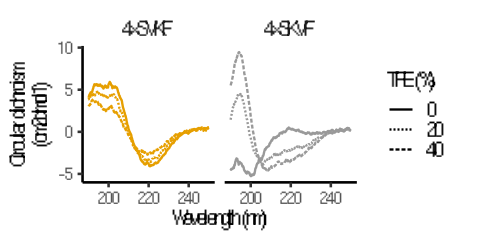

In [14]:
options(repr.plot.width=4, repr.plot.height=2) 

data %>%
  filter(!is.na(insert)) %>% 
  mutate(percent_tfe = as.factor(percent_tfe)) %>% 
  mutate(insert = paste0("4×", insert)) %>% 
  ggplot(aes(x = wavelength, y = dich, linetype = percent_tfe, color = insert)) +
  facet_wrap(~ fct_rev(insert), ncol = 3, scales = "fixed") +
  geom_line(aes(group = percent_tfe)) +
  scale_color_manual(values = cbPalette) +
  guides(color = F) +
  theme(legend.key.height = unit(0.5, "line")) +
  labs(x = "Wavelength (nm)", y = "Circular dichroism\n(cm2dmol1)", linetype = "TFE (%)")
  NULL
  
ggsave("../figures/cd_spectra.pdf", width = 4, height = 2)

### Plot SESCA inferred values

In [16]:

sesca_data <- read_csv("../data/sesca_inferred_ss.csv") %>% 
  left_join(annotations, by = "sample") %>% 
  print()

Rows: 6 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): sample
dbl (3): alpha, beta, coil

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 6 × 8
  sample    alpha  beta  coil order insert secondary percent_tfe
  <chr>     <dbl> <dbl> <dbl> <dbl> <chr>  <chr>           <dbl>
1 Alpha_0  0      0     1         1 SKVF   alpha               0
2 Alpha_20 0.329  0     0.671     2 SKVF   alpha              20
3 Alpha_40 0.788  0     0.212     3 SKVF   alpha              40
4 Beta_0   0.0552 0.516 0.429     4 SVKF   beta                0
5 Beta_20  0.0528 0.480 0.467     5 SVKF   beta               20
6 Beta_40  0.0664 0.451 0.483     6 SVKF   beta               40


### Plot SESCA predicted secondary structure for each TFE concentration fluorescence

NULL

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'α-helix' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'α-helix' in 'mbcsToSbcs': dot substituted for <b1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'α-helix' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'α-helix' in 'mbcsToSbcs': dot substituted for <b1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'α-helix' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'α-helix' in 'mbcsToSbcs': dot substituted for <b1>”
Warning message in grid.Call(C_textBounds, as.graphi

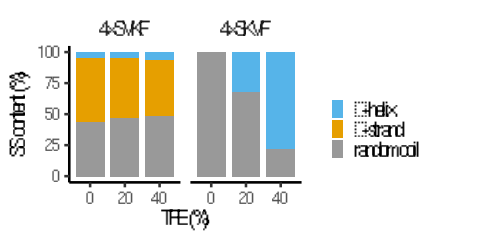

In [18]:
options(repr.plot.width=4, repr.plot.height=2) 

sesca_data %>%
  pivot_longer(c("alpha", "beta", "coil"), names_to = "ss", values_to = "sesca") %>%
  mutate(ss = fct_relevel(ss_names[ss], "α-helix", "β-strand", "random coil")) %>% 
  mutate(percent_tfe = as.factor(percent_tfe)) %>% 
  mutate(insert = paste0("4×", insert)) %>% 
  ggplot(aes(x = percent_tfe, y = sesca * 100, fill = ss)) +
  facet_wrap(~ fct_rev(insert), ncol = 3, scales = "fixed") +
  scale_fill_manual(values = cbPalette[c(3,2,1)]) +
  geom_col(width = 0.8) +
  # geom_line(aes(group = percent_tfe)) +
  # scale_color_manual(values = cbPalette) +
  # guides(color = F) +
  theme(legend.key.height = unit(0.5, "line"), legend.key.width = unit(0.5, "line")) +
  labs(fill = "", y = "SS content (%)", x = "TFE (%)")
  NULL
  
ggsave("../figures/sesca_ss_content.pdf", width = 4, height = 2)